<a href="https://colab.research.google.com/github/SejinHan25/crack_segmentation/blob/main/Image_Grid_Crop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Mount Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Image Grid Crop

In [2]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
%matplotlib inline

In [3]:
img = cv2.imread("/content/drive/MyDrive/Colab Notebooks/crack_segmentation/concretesupply-concrete-cracks-e1542210901206.jpg")
img_1 = cv2.resize(img,(320,320))
img_2 = cv2.resize(img,(2560,1440))

In [4]:
# img = img_1

In [5]:
img = img_2

In [6]:
img.shape

(1440, 2560, 3)

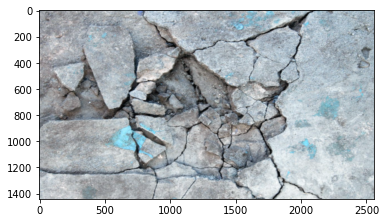

In [7]:
plt.imshow(img)
plt.show()

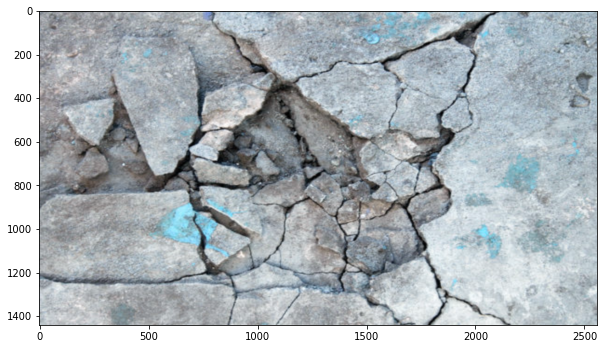

In [8]:
fig = plt.figure()
plt.imshow(img)
fig.set_figheight(10)
fig.set_figwidth(10)
plt.show()

In [9]:
# grid size, row, col
Grid_Size_height = 160
Grid_Size_width = 160
height = img.shape[0]
width = img.shape[1]
row = height // Grid_Size_height
col = width // Grid_Size_width
print(row)
print(col)

9
16


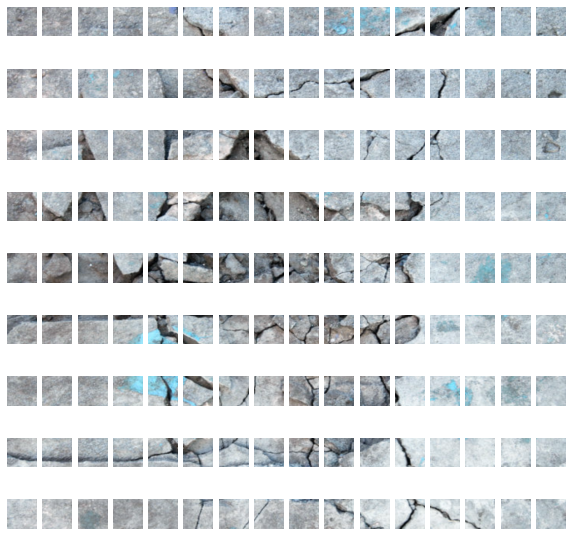

(1440, 2560, 3)
(144, 160, 160, 3)
9
16


In [22]:
def img_to_grid(img, row, col):
    height_grid_list = [[i.min(), i.max()+1] for i in np.array_split(range(img.shape[0]), row)] # image grid height list
    width_grid_list = [[i.min(), i.max()+1] for i in np.array_split(range(img.shape[1]), col)] # image grid width list
    grid_list = [img[j: jj, i: ii,: ] for j, jj in height_grid_list for i, ii in width_grid_list] # image grid list
    return grid_list, len(height_grid_list), len(width_grid_list)

def plot_grid(grid, row, col, height = 10, width = 10):
    fig, ax = plt.subplots(nrows = row, ncols = col)
    [axi.set_axis_off() for axi in ax.ravel()] 

    fig.set_figheight(height)
    fig.set_figwidth(width)
    c = 0
    for row in ax:
        for col in row:
            # col.imshow(np.flip(grid[c], axis = -1)) 
            col.imshow(grid[c])
            c += 1
    plt.show()



if __name__ == '__main__':
    row, col
    grid, rows, cols = img_to_grid(img, row, col)
    plot_grid(grid, rows, cols)

    print(img.shape)
    print(np.array(grid).shape)
    print(rows)
    print(cols)
    # print(grid[0])


## Test

### np.arraysplit()

In [15]:
a = np.array_split(range(img.shape[0]), row)

In [16]:
a[0]

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159])

In [17]:
ww = [[i.min(), i.max()+1] for i in np.array_split(range(img.shape[0]), row)]

In [18]:
print(ww)

[[0, 160], [160, 320], [320, 480], [480, 640], [640, 800], [800, 960], [960, 1120], [1120, 1280], [1280, 1440]]


### np.flip()

In [19]:
A = np.arange(27).reshape((3,3,3))

In [20]:
A

array([[[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8]],

       [[ 9, 10, 11],
        [12, 13, 14],
        [15, 16, 17]],

       [[18, 19, 20],
        [21, 22, 23],
        [24, 25, 26]]])

In [21]:
np.flip(A,-1)

array([[[ 2,  1,  0],
        [ 5,  4,  3],
        [ 8,  7,  6]],

       [[11, 10,  9],
        [14, 13, 12],
        [17, 16, 15]],

       [[20, 19, 18],
        [23, 22, 21],
        [26, 25, 24]]])